<a href="https://colab.research.google.com/github/Asif-PA/Hotel-Classification-Project/blob/main/Hotel_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

In [ ]:
df=pd.read_csv('/content/hotel.csv')

In [ ]:
df.shape

(7613, 9)

In [ ]:
df.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status
0,46,Online,0,67.5,2,0,0,2,1
1,21,Online,0,85.0,1,0,0,1,1
2,38,Online,0,73.1,2,2,0,4,1
3,62,Online,0,80.3,2,1,0,2,1
4,21,Online,0,129.0,2,0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lead_time                   7613 non-null   int64  
 1   market_segment_type         7613 non-null   object 
 2   no_of_special_requests      7613 non-null   int64  
 3   avg_price_per_room          7613 non-null   float64
 4   no_of_adults                7613 non-null   int64  
 5   no_of_weekend_nights        7613 non-null   int64  
 6   required_car_parking_space  7613 non-null   int64  
 7   no_of_week_nights           7613 non-null   int64  
 8   booking_status              7613 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 535.4+ KB


In [ ]:
df.describe()

,lead_time,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status
count,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000
mean,70.988309,0.516879,104.146733,1.879942,0.840142,0.028504,2.182714,0.347169
std,66.955796,0.678771,33.441101,0.492491,0.856220,0.166418,1.324258,0.476101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,82.400000,2.000000,0.000000,0.000000,1.000000,0.000000
50%,58.000000,0.000000,100.000000,2.000000,1.000000,0.000000,2.000000,0.000000
75%,100.000000,1.000000,121.250000,2.000000,2.000000,0.000000,3.000000,1.000000
max,443.000000,4.000000,540.000000,4.000000,6.000000,1.000000,15.000000,1.000000


**There are total 7613 rows with 9 columns**

2.insightful Data Analysis (2 Marks):

Perform exploratory data analysis (EDA) focusing on aspects that will directly impact the performance of your classification models.

Highlight specific, actionable insights from your EDA. For example, instead of simply stating the distribution of a feature, explain how that distribution might affect model training or prediction accuracy.

This section is not about exhaustive univariate/multivariate analysis, but rather about demonstrating your ability to identify the most relevant information for the task at hand

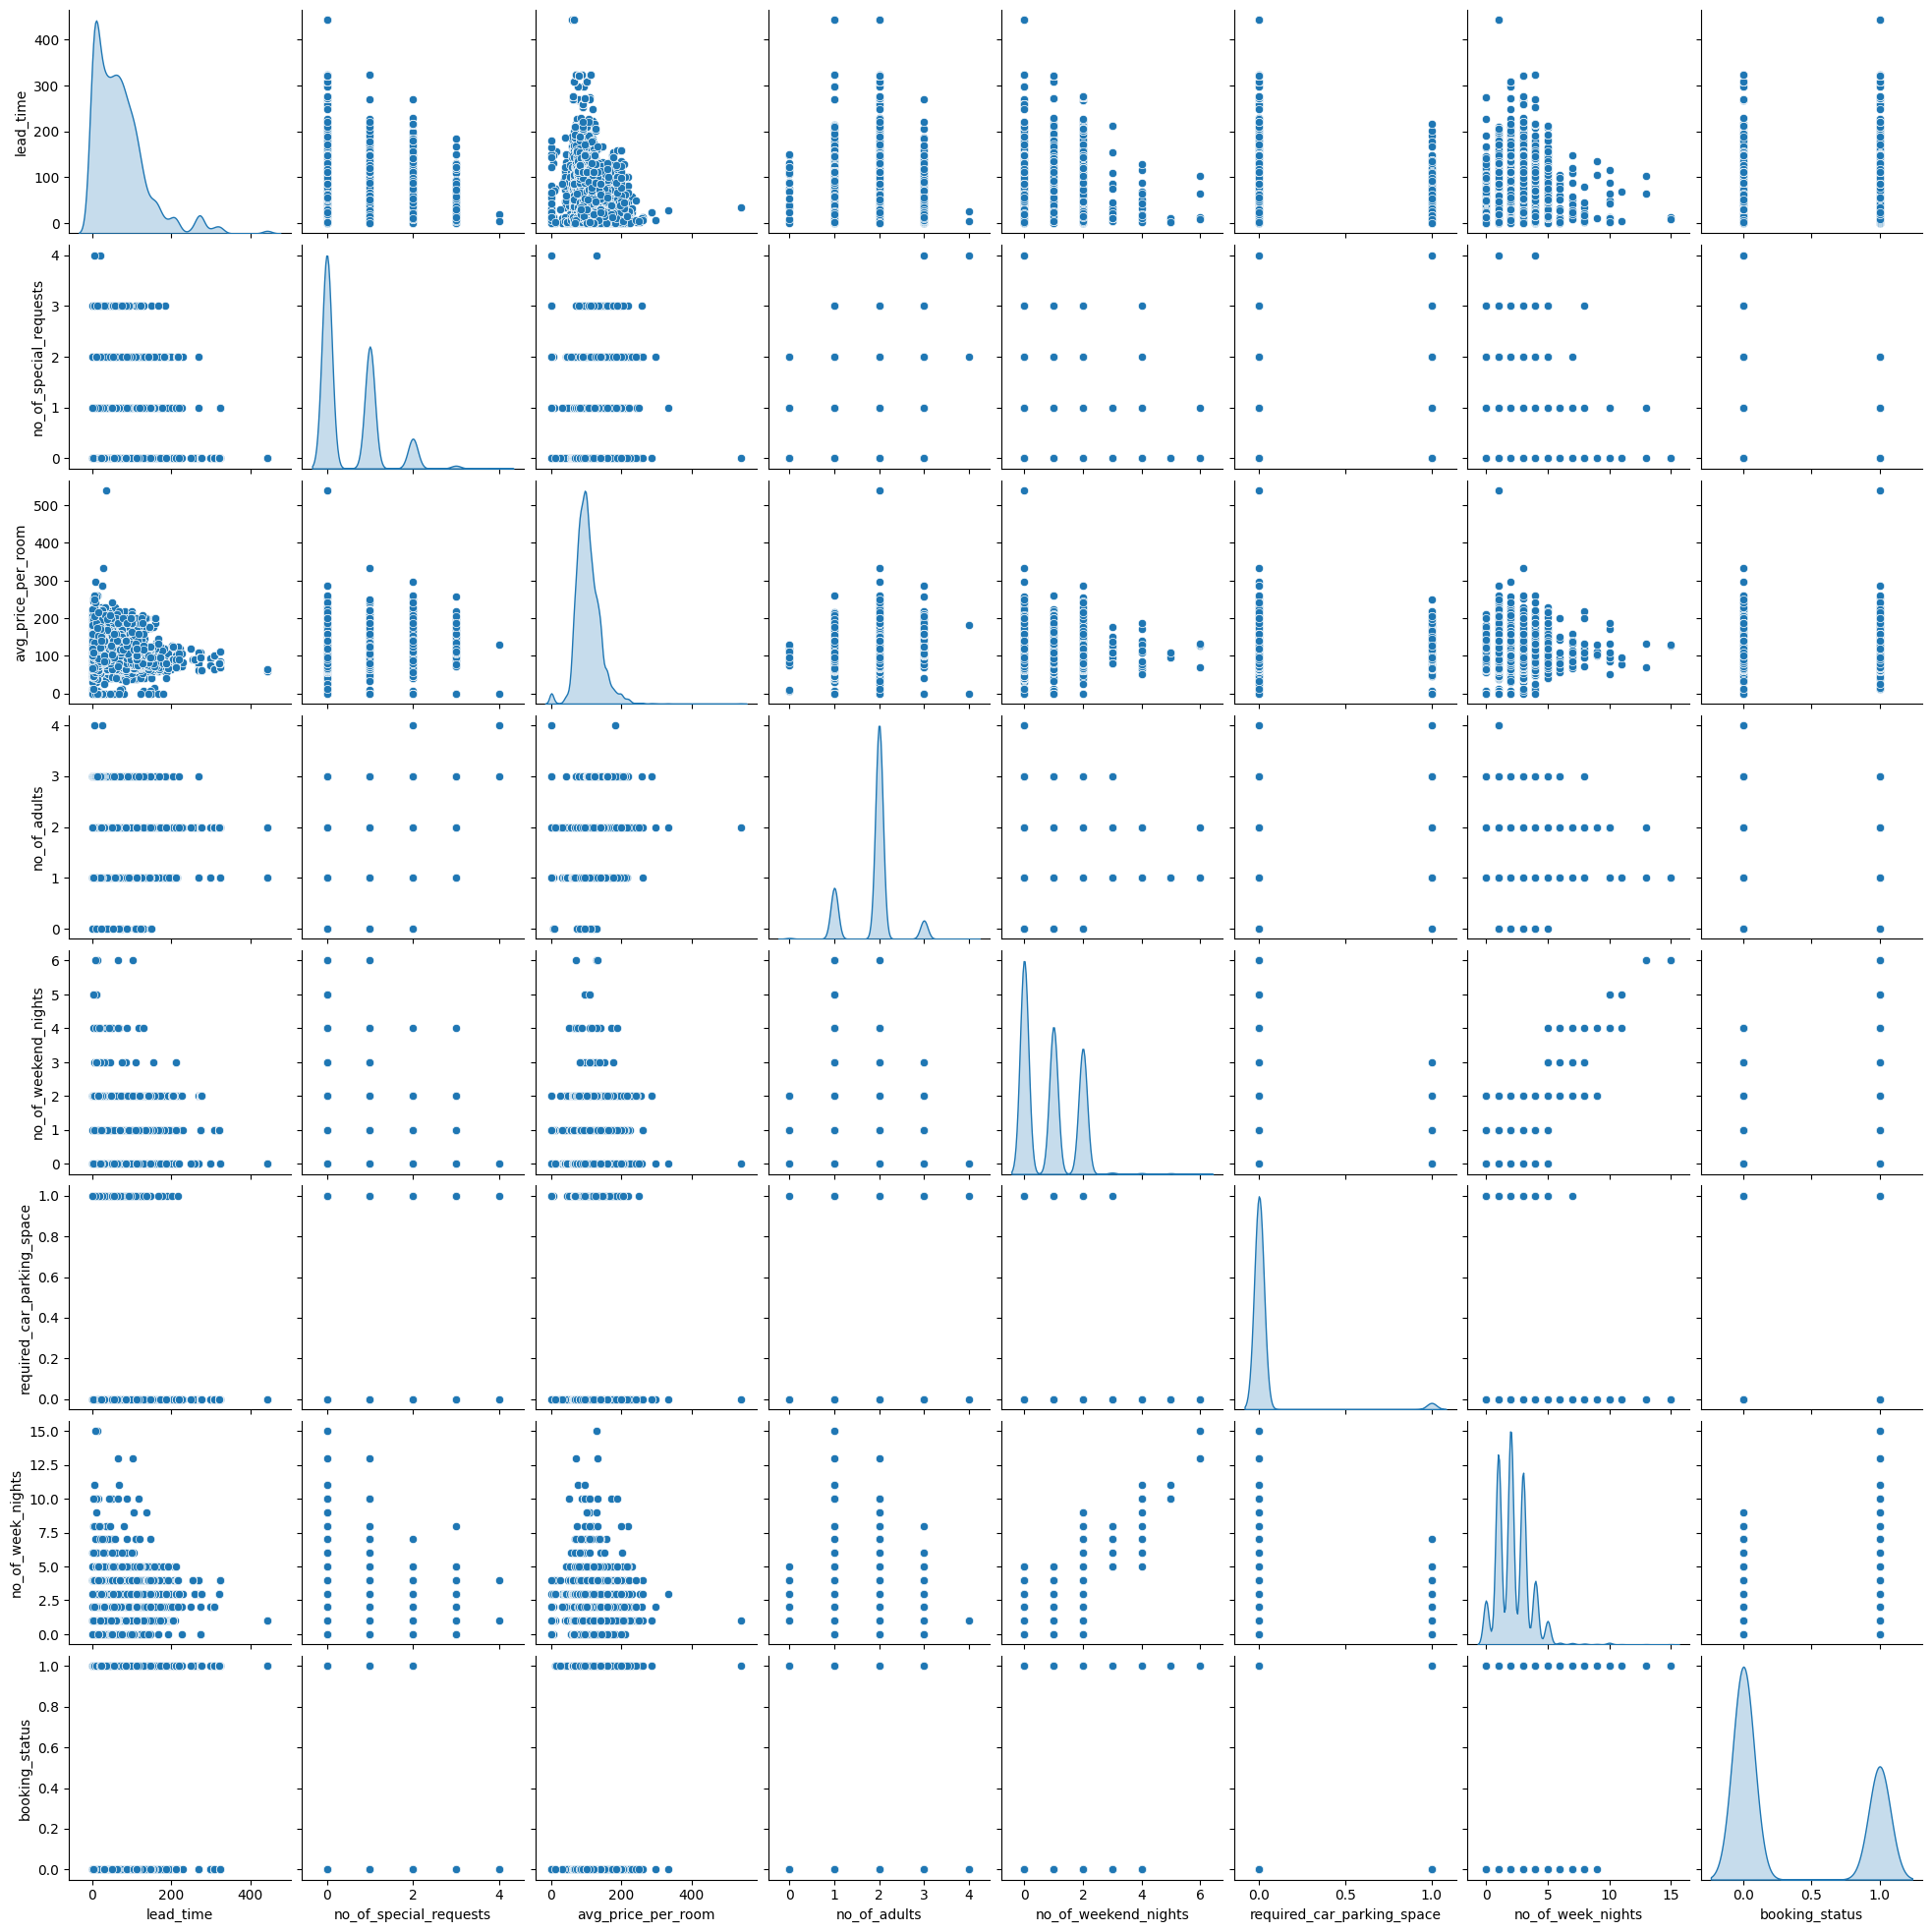

In [ ]:
sns.pairplot(df,diag_kind='kde')

**Since Lead time and avg_price per room are continues we will be checking its distrubution seperately**

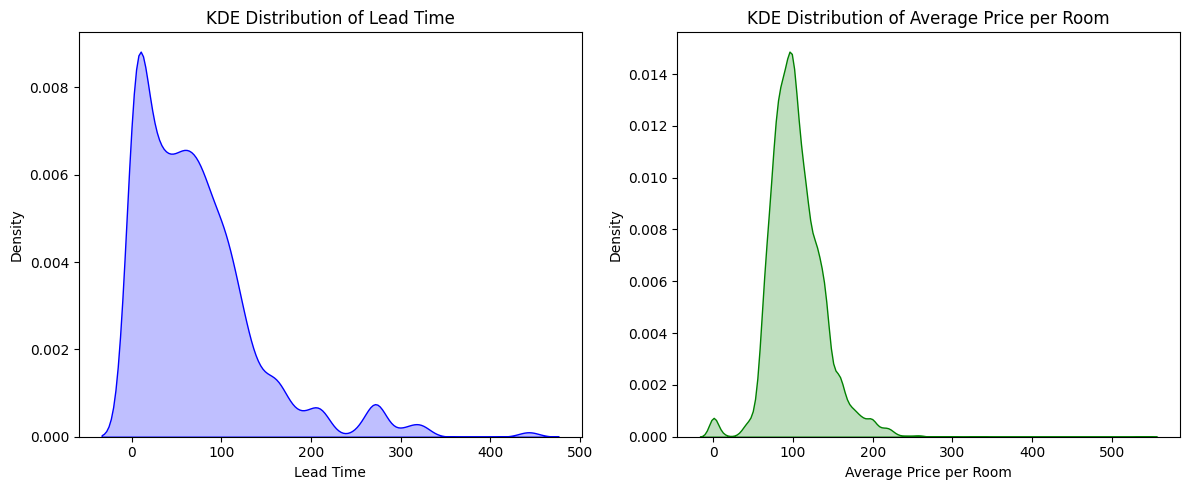

In [ ]:
plt.figure(figsize=(12, 5))

# KDE for lead_time
plt.subplot(1, 2, 1)
sns.kdeplot(df["lead_time"], fill=True, color="blue")
plt.title("KDE Distribution of Lead Time")
plt.xlabel("Lead Time")
plt.ylabel("Density")

# KDE for avg_price_per_room
plt.subplot(1, 2, 2)
sns.kdeplot(df["avg_price_per_room"], fill=True, color="green")
plt.title("KDE Distribution of Average Price per Room")
plt.xlabel("Average Price per Room")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

**Lead time is highly skewed to the right with extreme values, while avg price per room is somewhat normal but not perfectly spread. Applying a power transformer later should help in making the distribution more balanced and suitable for modeling. This may effect in linear models like logistic regression where tyhe normality of features is a assumption**

In [ ]:
df['no_of_special_requests'].value_counts()

,count
no_of_special_requests,
0,4417
1,2519
2,617
3,58
4,2


In [ ]:
from scipy.stats import pointbiserialr

# Selecting only numerical features
numerical_features = ['lead_time', 'no_of_special_requests', 'avg_price_per_room',
                      'no_of_adults', 'no_of_weekend_nights', 'required_car_parking_space', 'no_of_week_nights']

# Calculating point-biserial correlation
correlations = {}
for col in numerical_features:
    corr, p_value = pointbiserialr(df[col], df['booking_status'])
    correlations[col] = (corr, p_value)


corr_df = pd.DataFrame(correlations, index=['Correlation', 'P-value']).T
print(corr_df)


                            Correlation        P-value
lead_time                      0.285625  7.170508e-143
no_of_special_requests        -0.367536  3.564711e-242
avg_price_per_room             0.119581   1.191263e-25
no_of_adults                   0.038834   7.011628e-04
no_of_weekend_nights           0.047858   2.947715e-05
required_car_parking_space    -0.114963   8.088757e-24
no_of_week_nights              0.075864   3.407750e-11


**Longer lead times and higher room prices tend to increase cancellations, while having more special requests and a required parking space reduces them. Weekend and weeknight stays have a slight positive correlation with cancellations, but the effect isn’t as strong. Overall, customers who plan far ahead or pay more are more likely to cancel, while those making specific requests or needing parking seem more committed to their bookings**.

3.Data Defect Identification (1 Mark):

Identify any data defects, such as missing values, outliers, or inconsistencies.

In [ ]:
df.isnull().sum()

,0
lead_time,0
market_segment_type,0
no_of_special_requests,0
avg_price_per_room,0
no_of_adults,0
no_of_weekend_nights,0
required_car_parking_space,0
no_of_week_nights,0
booking_status,0


**There are no missin values**

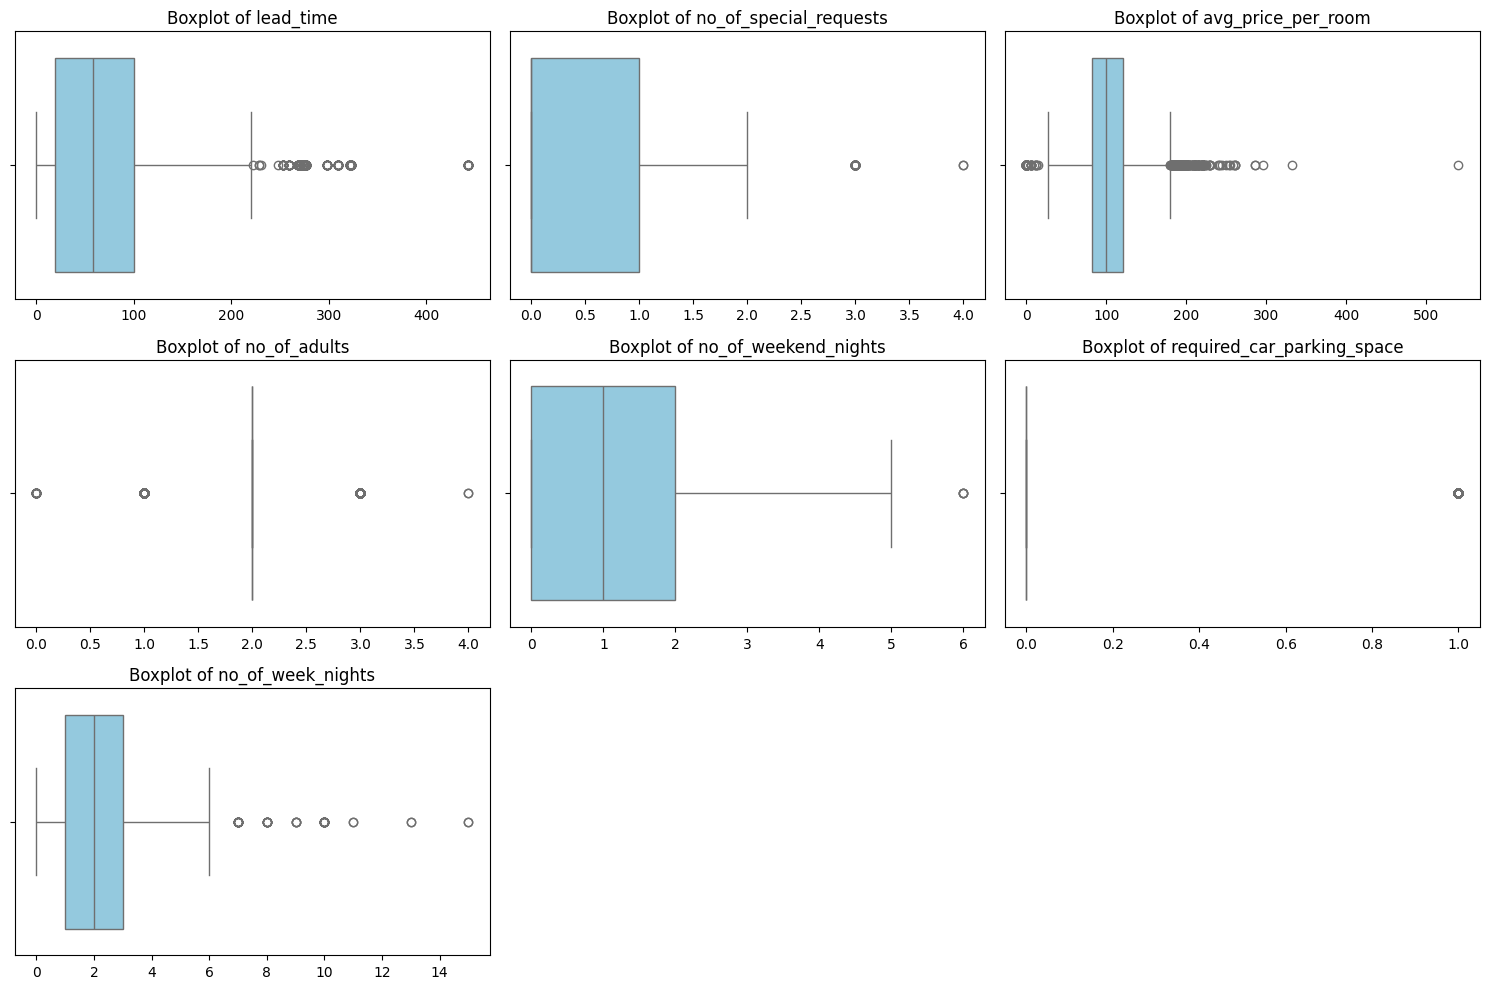

In [ ]:
plt.figure(figsize=(15, 10))

# Plotting boxplots
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

**There is significant outliers for lead time and avg price per room. now we wont be dong any outler trasformation, late we try power tranformer or some other techniqyues**

In [ ]:
independent_features = ['market_segment_type', 'no_of_special_requests',
                        'no_of_adults', 'no_of_weekend_nights', 'required_car_parking_space', 'no_of_week_nights']

# value counts for each independent feature
for feature in independent_features:
    print(f"Value counts for {feature}:")
    print(df[feature].value_counts())
    print("\n" + "-"*50 + "\n")


Value counts for market_segment_type:
market_segment_type
Online     5741
Offline    1872
Name: count, dtype: int64

--------------------------------------------------

Value counts for no_of_special_requests:
no_of_special_requests
0    4417
1    2519
2     617
3      58
4       2
Name: count, dtype: int64

--------------------------------------------------

Value counts for no_of_adults:
no_of_adults
2    5732
1    1364
3     492
0      23
4       2
Name: count, dtype: int64

--------------------------------------------------

Value counts for no_of_weekend_nights:
no_of_weekend_nights
0    3321
1    2289
2    1952
3      21
4      14
5      12
6       4
Name: count, dtype: int64

--------------------------------------------------

Value counts for required_car_parking_space:
required_car_parking_space
0    7396
1     217
Name: count, dtype: int64

--------------------------------------------------

Value counts for no_of_week_nights:
no_of_week_nights
2     2295
1     2026
3     183

In [ ]:
df[df['no_of_adults']==0].head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status
12,7,Online,1,85.96,0,2,0,2,1
1050,72,Online,0,78.00,0,0,0,1,1


4.Data Imbalance Assessment (1 Mark):

oAssess whether the target variable exhibits class imbalance. If so, briefly discuss its potential impact on model performance.

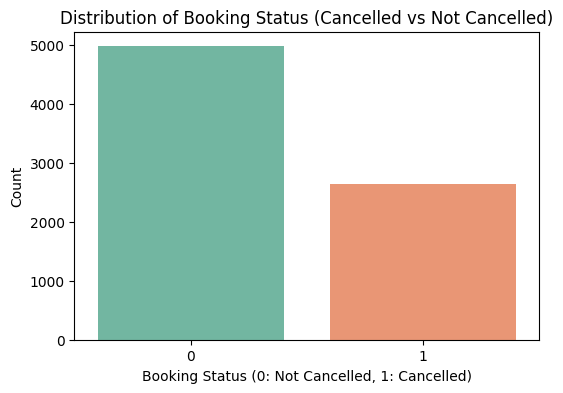

Target Variable Class Distribution:
booking_status
0    4970
1    2643
Name: count, dtype: int64


In [ ]:
# Checking the distribution of the target variable 'booking_status'
target_counts = df['booking_status'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='booking_status', data=df, palette='Set2')
plt.title('Distribution of Booking Status (Cancelled vs Not Cancelled)')
plt.xlabel('Booking Status (0: Not Cancelled, 1: Cancelled)')
plt.ylabel('Count')
plt.show()


print("Target Variable Class Distribution:")
print(target_counts)


In [ ]:
target_percentage = df['booking_status'].value_counts(normalize=True) * 100
print(target_percentage)

booking_status
0    65.283068
1    34.716932
Name: proportion, dtype: float64


**This indicates an imbalance in the data, with a higher percentage of non-cancelled bookings. Class imbalance can potentially affect model performance, leading to biased predictions towards the majority class.**

In [ ]:
df = pd.get_dummies(df, columns=['market_segment_type'], drop_first=True, dtype=int)

df.head()



,lead_time,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,market_segment_type_Online
0,46,0,67.5,2,0,0,2,1,1
1,21,0,85.0,1,0,0,1,1,1
2,38,0,73.1,2,2,0,4,1,1
3,62,0,80.3,2,1,0,2,1,1
4,21,0,129.0,2,0,0,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lead_time                   7613 non-null   int64  
 1   no_of_special_requests      7613 non-null   int64  
 2   avg_price_per_room          7613 non-null   float64
 3   no_of_adults                7613 non-null   int64  
 4   no_of_weekend_nights        7613 non-null   int64  
 5   required_car_parking_space  7613 non-null   int64  
 6   no_of_week_nights           7613 non-null   int64  
 7   booking_status              7613 non-null   int64  
 8   market_segment_type_Online  7613 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 535.4 KB


**Used one hot encoder for encoding the actegorrical variables**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('booking_status', axis=1)  # Drop the target variable from features
y = df['booking_status']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Part 2: Model Building and Evaluation (21 Marks)
Note: For all models built from this point forward:
Use cross-validation to obtain a more robust estimate of model performance and use the cross-validation accuracy for model comparison.
Generate the confusion matrix and classification report for each model to analyze its performance in detail.

1.Logistic Regression (Logit) (3 Marks):
oBuild a Logistic Regression model using the Logit function from the statsmodels library. (1 Mark)

Display the summary table of the model. (1 Mark)
oIdentify significant and insignificant features based on the p-values in the summary table. (1 Mark)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
dt = GradientBoostingClassifier(random_state=1)
dt.fit(X,y)
dt.feature_importances_

array([0.31463801, 0.35401161, 0.17577813, 0.00750472, 0.0099753 ,
       0.01730779, 0.03175573, 0.08902871])

In [ ]:
feature_names = X.columns


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt.feature_importances_
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                      Feature  Importance
1      no_of_special_requests    0.354012
0                   lead_time    0.314638
2          avg_price_per_room    0.175778
7  market_segment_type_Online    0.089029
6           no_of_week_nights    0.031756
5  required_car_parking_space    0.017308
4        no_of_weekend_nights    0.009975
3                no_of_adults    0.007505


In [ ]:
import statsmodels.api as sm
# Add constant to the independent variables
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = sm.Logit(y_train, X_train).fit()

# Display the summary table of the model
print(logreg.summary())



Optimization terminated successfully.
         Current function value: 0.466005
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                 6090
Model:                          Logit   Df Residuals:                     6081
Method:                           MLE   Df Model:                            8
Date:                Thu, 06 Feb 2025   Pseudo R-squ.:                  0.2798
Time:                        05:47:12   Log-Likelihood:                -2838.0
converged:                       True   LL-Null:                       -3940.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -4.4145      0.197    -22.405      0.000      

In [ ]:
# Identify significant and insignificant features based on p-values
significant_features = logreg.pvalues[logreg.pvalues < 0.05]
insignificant_features = logreg.pvalues[logreg.pvalues >= 0.05]

print("\nSignificant Features (p-value < 0.05):")
print(significant_features)

print("\nInsignificant Features (p-value >= 0.05):")
print(insignificant_features)


Significant Features (p-value < 0.05):
const                         3.504105e-111
lead_time                     3.696911e-119
no_of_special_requests        1.425969e-189
avg_price_per_room             8.009994e-52
no_of_adults                   2.874434e-02
no_of_weekend_nights           1.316629e-07
required_car_parking_space     1.938366e-10
market_segment_type_Online     2.513665e-52
dtype: float64

Insignificant Features (p-value >= 0.05):
no_of_week_nights    0.469954
dtype: float64


**Note on Significant Features:**

In the Logistic Regression model, significant features include lead_time, no_of_special_requests, and avg_price_per_room with p-values less than 0.05.

In the Gradient Boosting model, the most important features are no_of_special_requests, lead_time, and avg_price_per_room, based on feature importance scores.

Both models agree on the importance of lead_time and no_of_special_requests.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Create the pipeline without PowerTransformer
pipe = Pipeline((
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression())
))

# Fit the model
pipe.fit(X_train, y_train)

# Training and Testing Accuracy
print("Training Accuracy:", pipe.score(X_train, y_train))
print("Testing Accuracy:", pipe.score(X_test, y_test))


Training Accuracy: 0.774384236453202
Testing Accuracy: 0.7879185817465528


In [ ]:
# Predictions
predicted = pipe.predict(X_test)

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted))
print("Classification Report:")
print(classification_report(y_test, predicted))

Confusion Matrix:
[[877 131]
 [192 323]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1008
           1       0.71      0.63      0.67       515

    accuracy                           0.79      1523
   macro avg       0.77      0.75      0.76      1523
weighted avg       0.78      0.79      0.78      1523



In [ ]:
# Cross-validation (10-fold) to calculate accuracy
scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy after 10-fold cross-validation:", np.mean(scores))

Cross-validation scores: [0.75862069 0.79967159 0.75041051 0.7816092  0.76026273 0.79802956
 0.76847291 0.77011494 0.79967159 0.76190476]
Mean accuracy after 10-fold cross-validation: 0.7748768472906404


In [ ]:
from sklearn.preprocessing import PowerTransformer


# Create the pipeline with PowerTransformer
pipe = Pipeline((
    ("pt", PowerTransformer()),
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression())
))


pipe.fit(X_train, y_train)

# Training and Testing Accuracy
print("Training Accuracy:", pipe.score(X_train, y_train))
print("Testing Accuracy:", pipe.score(X_test, y_test))



Training Accuracy: 0.7714285714285715
Testing Accuracy: 0.7872619829284307


In [ ]:
# Predictions
predicted = pipe.predict(X_test)

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted))
print("Classification Report:")
print(classification_report(y_test, predicted))


Confusion Matrix:
[[869 139]
 [185 330]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1008
           1       0.70      0.64      0.67       515

    accuracy                           0.79      1523
   macro avg       0.76      0.75      0.76      1523
weighted avg       0.78      0.79      0.78      1523



In [ ]:
#cv for accuracy
scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy after 10-fold cross-validation:", np.mean(scores))

Cross-validation scores: [0.7635468  0.78325123 0.74712644 0.77832512 0.76190476 0.7865353
 0.77504105 0.76026273 0.79146141 0.75697865]
Mean accuracy after 10-fold cross-validation: 0.7704433497536946


In [ ]:
pipe.predict_proba(X_test)

array([[0.92215884, 0.07784116],
       [0.91082644, 0.08917356],
       [0.88140119, 0.11859881],
       ...,
       [0.60056436, 0.39943564],
       [0.43802939, 0.56197061],
       [0.78762875, 0.21237125]])

In [ ]:
pipe.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

**3.Decision Tree :**

oBaseline Model: Build a Decision Tree classifier with default hyperparameters (no tuning).
oHyperparameter Tuning (Max Depth): Perform hyperparameter tuning to find the optimal max_depth for the Decision Tree. Plot a validation curve showing the relationship between max_depth and cross-validation accuracy to justify your choice.
oTuned Model: Build a Decision Tree classifier using the optimal max_depth identified in the previous step.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# With Pipeline
pipe = Pipeline((
    ("dt", DecisionTreeClassifier(random_state=1)),
))

pipe.fit(X_train, y_train)

# Training and Testing Accuracy
print("Training Accuracy")
print(pipe.score(X_train, y_train))
print("Testing Accuracy")
print(pipe.score(X_test, y_test))



Training Accuracy
0.9914614121510673
Testing Accuracy
0.8128693368351937


In [ ]:
# Predict and evaluate
predicted = pipe.predict(X_test)
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

[[867 141]
 [144 371]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1008
           1       0.72      0.72      0.72       515

    accuracy                           0.81      1523
   macro avg       0.79      0.79      0.79      1523
weighted avg       0.81      0.81      0.81      1523



In [ ]:
# Cross-validation to calculate average accuracy
scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Mean accuracy after 10 fold cross validation: ")
print(np.mean(scores))

[0.81773399 0.81116585 0.79146141 0.81609195 0.80131363 0.83251232
 0.80788177 0.83579639 0.8226601  0.82430213]
Mean accuracy after 10 fold cross validation: 
0.8160919540229884


**As we can see the traing accuracy is at very high suggesting a overfitting. we will be optimiziung the max depth hyperparametr to avoid this overfitting**

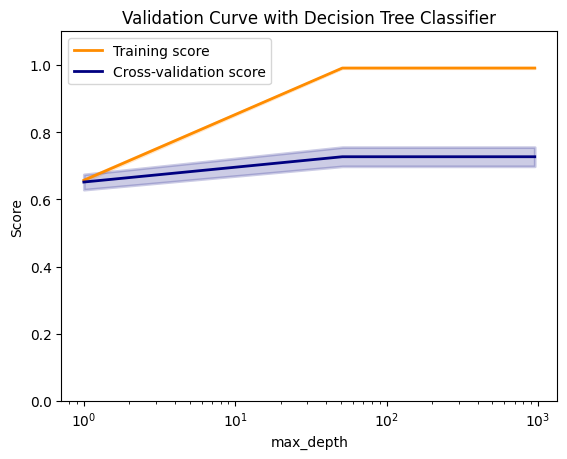

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 1000, 50)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=1), X, y, param_name="max_depth", param_range=param_range,
    scoring="accuracy", n_jobs=-1, cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                 alpha=0.2, color="darkorange", lw=lw)


plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                 alpha=0.2, color="navy", lw=lw)

plt.legend(loc="best")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

#  parameter grid for max_depth tuning
tuned_parameters = [{'max_depth': range(2, 20)}]
decision_tree_model = DecisionTreeClassifier(random_state=1)
tree_grid = GridSearchCV(estimator=decision_tree_model, param_grid=tuned_parameters, cv=10, n_jobs=-1)
tree_grid.fit(X_train, y_train)
#  best parameters after tuning
print('Best parameters for Decision Tree Classifier: ', tree_grid.best_params_, '\n')


Best parameters for Decision Tree Classifier:  {'max_depth': 10} 



In [ ]:
# Decision Tree classifier with the best parameters
pipe = DecisionTreeClassifier(max_depth=tree_grid.best_params_['max_depth'], random_state=1)
pipe.fit(X_train, y_train)

# Training Accuracy
print("Training Accuracy")
print(pipe.score(X_train, y_train))

# Testing Accuracy
print("Testing Accuracy")
print(pipe.score(X_test, y_test))



Training Accuracy
0.8589490968801313
Testing Accuracy
0.8424162836506894


**Here we can see the overfittinfg is reduced considerably by hyperparametr tuning of max depth**

In [ ]:
 #Make predictions on the test data
predicted = pipe.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

# Cross-validation accuracy
scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy after 10 fold cross-validation: ", np.mean(scores))

[[878 130]
 [110 405]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1008
           1       0.76      0.79      0.77       515

    accuracy                           0.84      1523
   macro avg       0.82      0.83      0.83      1523
weighted avg       0.84      0.84      0.84      1523

Cross-validation scores: [0.82758621 0.83415435 0.81444992 0.81937603 0.80952381 0.79638752
 0.82430213 0.82594417 0.8456486  0.79967159]
Mean accuracy after 10 fold cross-validation:  0.819704433497537


**The model performs well overall, with the F1-score and recall being decent, particularly for class 0 (the majority class)**.

**The accuracy is a bit lower for class 1 (minority class),hence we will have to do somthing  like smote or sampling fro this to improve in the coming iterations**

**Here we improved the mdoel perfomance with hyperpaprametr tuning a little**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
pipe = Pipeline((
    ("rf", RandomForestClassifier(random_state=1)),
))
pipe.fit(X_train, y_train)
print("Training Accuracy")
print(pipe.score(X_train, y_train))
print("Testing Accuracy")
print(pipe.score(X_test, y_test))
predicted = pipe.predict(X_test)
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))
scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Mean accuracy after 10 fold cross validation: ")
print(np.mean(scores))


Training Accuracy
0.9908045977011494
Testing Accuracy
0.8581746552856205
[[901 101]
 [115 406]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1002
           1       0.80      0.78      0.79       521

    accuracy                           0.86      1523
   macro avg       0.84      0.84      0.84      1523
weighted avg       0.86      0.86      0.86      1523

[0.8407225  0.83908046 0.84236453 0.84729064 0.863711   0.8456486
 0.84893268 0.84400657 0.84236453 0.83743842]
Mean accuracy after 10 fold cross validation: 
0.8451559934318554


**Here also we have overfitting in traing hence we do the validation curve and optimise it**

Automatically created module for IPython interactive environment


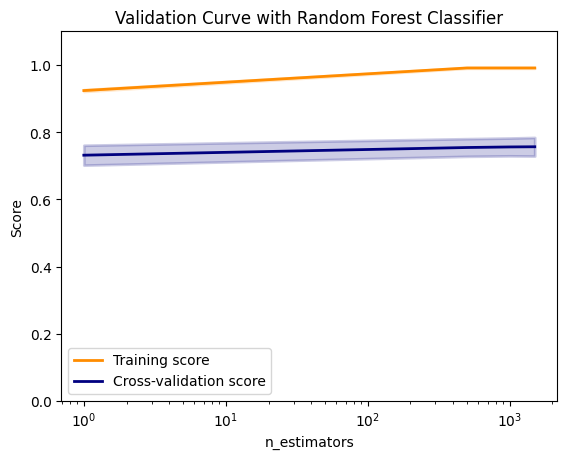

In [ ]:
print(__doc__)
param_range = np.arange(1, 2000, 500)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=1), X, y, param_name="n_estimators", param_range=param_range,
    scoring="accuracy", n_jobs=-1, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random Forest Classifier")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


Automatically created module for IPython interactive environment


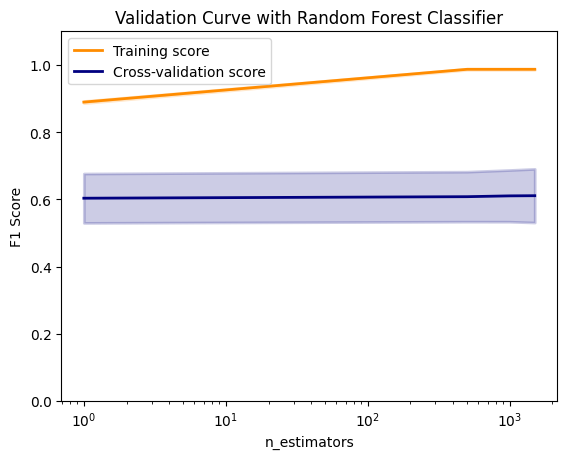

In [ ]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

param_range = np.arange(1, 2000, 500)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=1), X, y, param_name="n_estimators", param_range=param_range,
    scoring="f1", n_jobs=-1, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random Forest Classifier")
plt.xlabel("n_estimators")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


In [ ]:
#doing hyperparametr tuning and tryuing to find the ]best model
tuned_paramaters = [{'n_estimators': range(2, 1000, 100)}]
decision_tree_model = RandomForestClassifier(random_state=1)
tree_grid = GridSearchCV(estimator=decision_tree_model, param_grid=tuned_paramaters, cv=5, n_jobs=-1)
tree_grid.fit(X_train, y_train)
print('Best parameters for Random Forest Classifier: ', tree_grid.best_params_, '\n')


Best parameters for Random Forest Classifier:  {'n_estimators': 402} 



In [ ]:
#building with the optimized hyperpaparmetr
pipe = RandomForestClassifier(n_estimators = tree_grid.best_params_['n_estimators'], random_state=1)
pipe.fit(X_train,y_train)
print("Training Accuracy")
print(pipe.score(X_train,y_train))
print("Testing Accuracy")
print(pipe.score(X_test,y_test))
predicted = pipe.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
scores = cross_val_score(pipe, X_train, y_train, cv = 10, scoring = 'accuracy')
print(scores)
print("Mean accuracy after 10 fold cross validation: ")
print(np.mean(scores))


Training Accuracy
0.9909688013136289
Testing Accuracy
0.8594878529218647
[[899 103]
 [111 410]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1002
           1       0.80      0.79      0.79       521

    accuracy                           0.86      1523
   macro avg       0.84      0.84      0.84      1523
weighted avg       0.86      0.86      0.86      1523

[0.83908046 0.84400657 0.84893268 0.84400657 0.86042693 0.8456486
 0.84400657 0.84400657 0.8456486  0.83579639]
Mean accuracy after 10 fold cross validation: 
0.8451559934318554


**There is no improvement after tuning**

**5.Gradient Boosting**

oBaseline Model: Build a Gradient Boosting classifier with default hyperparameters.
oHyperparameter Tuning (n_estimators): Tune the n_estimators hyperparameter and plot a validation curve.
oTuned Model: Build a Gradient Boosting classifier using the optimal n_estimators.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
pipe = Pipeline((
    ("rf", GradientBoostingClassifier(random_state=1)),
))
pipe.fit(X_train, y_train)
print("Training Accuracy")
print(pipe.score(X_train, y_train))
print("Testing Accuracy")
print(pipe.score(X_test, y_test))
predicted = pipe.predict(X_test)
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))
scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Mean accuracy after 10 fold cross validation: ")
print(np.mean(scores))


Training Accuracy
0.8303776683087027
Testing Accuracy
0.8174655285620486
[[844 158]
 [120 401]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1002
           1       0.72      0.77      0.74       521

    accuracy                           0.82      1523
   macro avg       0.80      0.81      0.80      1523
weighted avg       0.82      0.82      0.82      1523

[0.81444992 0.81116585 0.81116585 0.82594417 0.83415435 0.79474548
 0.80131363 0.81609195 0.82430213 0.81937603]
Mean accuracy after 10 fold cross validation: 
0.8152709359605911


**The Random Forest model achieved a training accuracy of 83.04% and a testing accuracy of 81.75%. The cross-validation mean accuracy is 81.53%, with decent precision and recall for both classes**

Automatically created module for IPython interactive environment


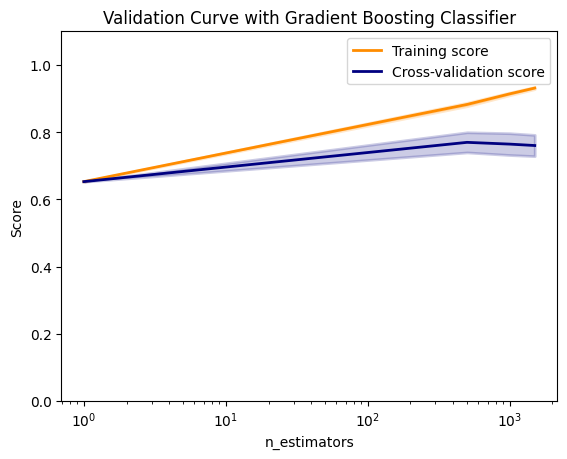

In [ ]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = np.arange(1,2000,500)
train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(random_state=1), X, y, param_name="n_estimators", param_range=param_range,
    scoring="accuracy", n_jobs=-1, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Gradient Boosting Classifier")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


In [ ]:
#tuning the hyperparametr here
tuned_paramaters = [{'n_estimators': range(2, 1000, 100)}]
decision_tree_model = GradientBoostingClassifier(random_state=1)
tree_grid = GridSearchCV(estimator=decision_tree_model, param_grid=tuned_paramaters, cv=5, n_jobs=-1)
tree_grid.fit(X_train, y_train)
# get the best parameters
print('Best parameters for Gradient Boosting Classifier: ', tree_grid.best_params_, '\n')


Best parameters for Gradient Boosting Classifier:  {'n_estimators': 802} 



In [ ]:
#Build the tuned model using the tuned hyperparameters
pipe = GradientBoostingClassifier(n_estimators=tree_grid.best_params_['n_estimators'], random_state=1)
pipe.fit(X_train, y_train)
print("Training Accuracy")
print(pipe.score(X_train, y_train))
print("Testing Accuracy")
print(pipe.score(X_test, y_test))
predicted = pipe.predict(X_test)
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))
scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Mean accuracy after 10 fold cross validation: ")
print(np.mean(scores))


Training Accuracy
0.8983579638752053
Testing Accuracy
0.855548260013132
[[900 102]
 [118 403]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1002
           1       0.80      0.77      0.79       521

    accuracy                           0.86      1523
   macro avg       0.84      0.84      0.84      1523
weighted avg       0.85      0.86      0.85      1523

[0.83415435 0.82758621 0.83251232 0.82758621 0.85057471 0.80623974
 0.84893268 0.83743842 0.83743842 0.82758621]
Mean accuracy after 10 fold cross validation: 
0.8330049261083744


**The confusion matrix and classification report show that the model performs reasonably well, with the F1-score for class 1 being 0.79. The cross-validation accuracy score is approximately 83.3%, which suggests the model generalizes well across different subsets of the data.**

**6.XGBoost :**

oBaseline Model: Build an XGBoost classifier with default hyperparameters.
oHyperparameter Tuning (n_estimators): Tune the n_estimators hyperparameter and plot a validation curve. (1 Marks)
oTuned Model: Build an XGBoost classifier using the optimal n_estimators.

In [ ]:
# Baseline Model: Build an XGBoost classifier with default hyperparameters
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)

print("Training Accuracy")
print(xgb_model.score(X_train, y_train))
print("Testing Accuracy")
print(xgb_model.score(X_test, y_test))

# Predictions and  metrics
predicted = xgb_model.predict(X_test)
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

# Cross-validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Mean accuracy after 10 fold cross validation: ")
print(np.mean(scores))



Training Accuracy
0.922495894909688
Testing Accuracy
0.8614576493762311
[[899 103]
 [108 413]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1002
           1       0.80      0.79      0.80       521

    accuracy                           0.86      1523
   macro avg       0.85      0.84      0.85      1523
weighted avg       0.86      0.86      0.86      1523



AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
param_range = np.arange(50, 1001, 50)
train_scores, test_scores = validation_curve(
    XGBClassifier(random_state=1), X, y, param_name="n_estimators", param_range=param_range,
    scoring="accuracy", n_jobs=-1, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with XGBoost Classifier")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
tuned_xgb = XGBClassifier(n_estimators=grid_search.best_params_['n_estimators'], random_state=1)
tuned_xgb.fit(X_train, y_train)
print("Training Accuracy")
print(tuned_xgb.score(X_train, y_train))
print("Testing Accuracy")
print(tuned_xgb.score(X_test, y_test))
predicted = tuned_xgb.predict(X_test)
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))
scores = cross_val_score(tuned_xgb, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Mean accuracy after 10 fold cross validation: ")
print(np.mean(scores))

In [ ]:
import xgboost as xgb
pipe = xgb.XGBClassifier(random_state=1, n_estimators=3000, learning_rate=0.007)
pipe.fit(X_train, y_train)
print("Training Accuracy")
print(pipe.score(X_train, y_train))
print("Testing Accuracy")
print(pipe.score(X_test, y_test))
predicted = pipe.predict(X_test)
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))


Training Accuracy
0.9049261083743843
Testing Accuracy
0.855548260013132
[[895 107]
 [113 408]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1002
           1       0.79      0.78      0.79       521

    accuracy                           0.86      1523
   macro avg       0.84      0.84      0.84      1523
weighted avg       0.86      0.86      0.86      1523



**The XGBoost classifier achieved a training accuracy of 90.49% and a testing accuracy of 85.55%. The confusion matrix indicates good performance, with the model effectively distinguishing between the two classes, but with slightly lower recall for class 1. The weighted average F1-score is 0.86, demonstrating overall balanced performance.**

**7.KNN (3 Marks):**

oBaseline Model: Build a KNN classifier with default hyperparameters. (1 Mark)
oHyperparameter Tuning (n_neighbors): Tune the n_neighbors hyperparameter and plot a validation curve. (1 Marks)
oTuned Model: Build a KNN classifier using the optimal n_neighbors. (1 Mark)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline((
    #("pt", PowerTransformer()),
    ("scaler", StandardScaler()),
    ("dt", KNeighborsClassifier()),
))
pipe.fit(X_train,y_train)
print("Training Accuracy")
print(pipe.score(X_train,y_train))
print("Testing Accuracy")
print(pipe.score(X_test,y_test))
predicted = pipe.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
scores = cross_val_score(pipe, X_train, y_train, cv = 10, scoring = 'accuracy')
print(scores)
print("Mean accuracy after 10 fold cross validation: ")
print(np.mean(scores))


Training Accuracy
0.8663382594417077
Testing Accuracy
0.8135259356533159
[[862 140]
 [144 377]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1002
           1       0.73      0.72      0.73       521

    accuracy                           0.81      1523
   macro avg       0.79      0.79      0.79      1523
weighted avg       0.81      0.81      0.81      1523

[0.79967159 0.82758621 0.81280788 0.79146141 0.82758621 0.78817734
 0.79146141 0.79802956 0.81773399 0.79310345]
Mean accuracy after 10 fold cross validation: 
0.8047619047619048


**The K-Nearest Neighbors (KNN) model achieved a training accuracy of 86.63% and testing accuracy of 81.35%. The model's performance in cross-validation averaged to 80.48%, with class 0 (negative class) showing strong precision and recall, while class 1 (positive class) had slightly lower precision and recall.**

Automatically created module for IPython interactive environment


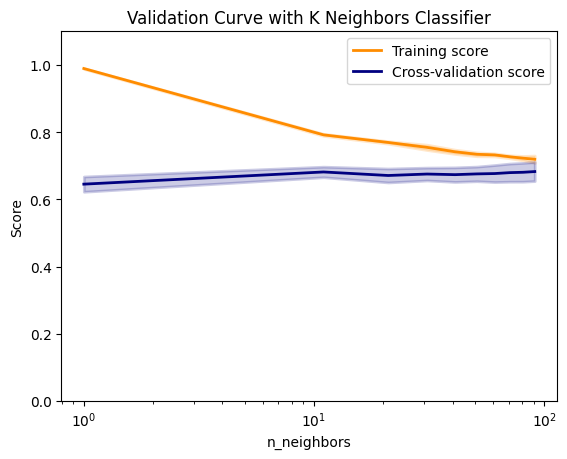

In [ ]:
print(__doc__)
param_range = np.arange(1, 100, 10)
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X, y, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", n_jobs=-1, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with K Neighbors Classifier")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


In [ ]:
tuned_paramaters = [{'n_neighbors': range(2, 1000, 50)}]
decision_tree_model = KNeighborsClassifier()
tree_grid = GridSearchCV(estimator = decision_tree_model, param_grid = tuned_paramaters, cv = 5, n_jobs=-1)
tree_grid.fit(X_train, y_train)
print('Best parameters for KNN: ', tree_grid.best_params_, '\n')


Best parameters for KNN:  {'n_neighbors': 2} 



**Getting n enigbours as 2 might lead to overfitting or lower perfomance. i am going with the 2 as hyperparametr, but the defaut model will work better than this for sure**

In [ ]:
pipe = KNeighborsClassifier(n_neighbors = tree_grid.best_params_['n_neighbors'])
pipe.fit(X_train, y_train)
print("Training Accuracy")
print(pipe.score(X_train, y_train))
print("Testing Accuracy")
print(pipe.score(X_test, y_test))
predicted = pipe.predict(X_test)
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))
scores = cross_val_score(pipe, X_train, y_train, cv = 10, scoring = 'accuracy')
print(scores)
print("Mean accuracy after 10 fold cross validation: ")
print(np.mean(scores))


Training Accuracy
0.8809523809523809
Testing Accuracy
0.7708470124753776
[[934  68]
 [281 240]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1002
           1       0.78      0.46      0.58       521

    accuracy                           0.77      1523
   macro avg       0.77      0.70      0.71      1523
weighted avg       0.77      0.77      0.75      1523

[0.75369458 0.75533662 0.79310345 0.74712644 0.76518883 0.76683087
 0.77175698 0.75533662 0.77504105 0.75697865]
Mean accuracy after 10 fold cross validation: 
0.7640394088669951


In [ ]:
import gradio as gr
# Define the prediction function for Gradio
def predict_iris(lead_time, market_segment_type, no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights):
    input_data = np.array([[lead_time, market_segment_type, no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights]])
    prediction = pipe.predict(input_data)[0]
    probabilities = pipe.predict_proba(input_data)[0]

    # Convert numerical prediction to class name
    class_names = pipe.target_names
    predicted_class = class_names[prediction]

    # Prepare the output probabilities for Gradio
    prob_dict = {class_names[i]: float(probabilities[i]) for i in range(len(class_names))}

    return predicted_class, prob_dict

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_iris,
    inputs=[

        gr.Number(label="lead_time"),   # Use gr.Number directly
        gr.Number(label="market_segment_type"),  # Use gr.Number directly
        gr.Number(label="no_of_special_requests"),   # Use gr.Number directly
         gr.Number(label="avg_price_per_room"),  # Use gr.Number directly
        gr.Number(label="no_of_adults"),   # Use gr.Number directly
        gr.Number(label="no_of_weekend_nights"),  # Use gr.Number directly
        gr.Number(label="required_car_parking_space"),   # Use gr.Number directly
          gr.Number(label="no_of_week_nights"),   # Use gr.Number directly
    ],
    outputs=[
        gr.Textbox(label="Predicted Class"),  # Use gr.Textbox directly
        gr.Label(label="Class Probabilities"),  # Use gr.Label directly
    ],
    title="Iris Flower Classifier",
    description="Enter the measurements of an Iris flower to predict its species.",
    examples=[
         [10, 0, 1, 100.0, 2, 2, 0, 5],  # Encoded 'Online' as 0
        [20, 1, 0, 200.0, 1, 1, 1, 3],  # Encoded 'Offline' as 1
        [30, 2, 2, 150.0, 3, 0, 0, 7],  # Encoded 'Corporate' as 2
    ],
)

# Launch the interface
iface.launch()

In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.1/464.1 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.27.1
    Uninstalling huggingface-hub-0.27.1:
      Successfully uninstalled huggingface-hub-0.27.1


In [ ]:
import gradio as gr
import numpy as np

def predict_hotel_booking(lead_time, market_segment_type, no_of_special_requests, avg_price_per_room, no_of_adults, no_of_weekend_nights, required_car_parking_space, no_of_week_nights):
    input_data = np.array([[lead_time, market_segment_type, no_of_special_requests, avg_price_per_room, no_of_adults, no_of_weekend_nights, required_car_parking_space, no_of_week_nights]])
    prediction = pipe.predict(input_data)[0]
    probabilities = pipe.predict_proba(input_data)[0]
    class_names = pipe.classes_
    predicted_class = class_names[prediction]
    prob_dict = {class_names[i]: float(probabilities[i]) for i in range(len(class_names))}
    return predicted_class, prob_dict

iface = gr.Interface(
    fn=predict_hotel_booking,
    inputs=[
        gr.Number(label="Lead Time"),
        gr.Number(label="Market Segment Type"),
        gr.Number(label="No of Special Requests"),
        gr.Number(label="Avg Price per Room"),
        gr.Number(label="No of Adults"),
        gr.Number(label="No of Weekend Nights"),
        gr.Number(label="Required Car Parking Space"),
        gr.Number(label="No of Week Nights"),
    ],
    outputs=[
        gr.Textbox(label="Predicted Class"),
        gr.Label(label="Class Probabilities"),
    ],
    title="Hotel Booking Classifier",
    description="Enter details of a hotel booking to predict the booking status.",
    examples=[
         [10, 0, 1, 100.0, 2, 2, 0, 5],
         [20, 1, 0, 200.0, 1, 1, 1, 3],
         [30, 2, 2, 150.0, 3, 0, 0, 7],
    ],
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6817414d268ec2fc92.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**1. Logistic Regression:**

The Logistic Regression model performed reasonably well, showing a decent balance between accuracy and F1-score. However, its ability to capture complex patterns in the data was limited, and it did not perform as well as some of the more sophisticated models. It's a good baseline model, but not the top performer.

**2. Random Forest:**

Random Forest performed significantly better than Logistic Regression. It handled overfitting better and showed a better generalization on unseen data. Its performance was stable across both training and testing, and its accuracy and F1-scores were higher. It was a strong contender for the best model but still had some room for improvement.

**3. Decision Tree:**

Decision Tree, on the other hand, showed a strong performance initially but suffered from overfitting. The training accuracy was high, but testing accuracy was lower. We could see that the model's ability to generalize was affected, making it less reliable compared to models like Random Forest and XGBoost. It didn't perform as well overall, though it was better than Logistic Regression.

**4. Gradient Boosting:**

Gradient Boosting performed really well in terms of both accuracy and F1-score. It managed to capture the intricate patterns in the data and provided reliable predictions. It showed a notable improvement compared to Decision Tree and Logistic Regression, and it was definitely one of the stronger models in our comparison.

**5. XGBoost:**

XGBoost was one of the best models overall. Its performance in both accuracy and F1-scores was the highest. It showed great results, handling complex relationships in the data very well. It was not only fast but also very effective in terms of predicting accurately on both the training and testing data. It was the clear winner among all the models.

**6. KNN (Without Hyperparameter Tuning):**
The KNN model, without any tuning, performed okay, but it wasn’t able to compete with more advanced models like XGBoost and Random Forest

**7. KNN (With Hyperparameter Tuning):**

After applying hyperparameter tuning to KNN, we observed no improvement,becaus  o low n_neigbour

**Which Model Performed the Best?**

Based on the performance metrics, XGBoost came out on top. It had the highest accuracy and F1-score, making it the best overall model for this dataset. The model was highly effective in both training and testing, and it managed to generalize well. Random Forest and Gradient Boosting were also strong performers, but XGBoost slightly outperformed them in this case.Since we couldnt do the hyper paramet tuning becaus eof library mismatch

**Did the Models Improve with Hyperparameter Tuning**

Yes, some models did show improvement with hyperparameter tuning. The most noticeable dopwngrade in perfomance  was in KNN, where tuning the hypr parametr showd less peromance vbacuse of the n _neigbour 2 However, hyperparameter tuning did  help much with Decision Tree , as their performance remained better compared to their base models.  Random Forest, on the other hand, didn’t see as much improvement from tuning, but they were already performing well from the start.

**Which Type of Error is More Costly: False Positive or False Negative?**

False Negative is more costly than a False Positive because the hotel fails to take action to mitigate revenue loss when cancellations occur. As a result, the operational and financial impact is greater with a False Negative, leading to inventory loss and missed opportunities to maximize revenue.

**Conclusion:**

Overall, the XGBoost model was the best performer, followed closely by Random Forest and Gradient Boosting. False negatives represent the greater risk in this problem, and reducing them is critical for preventing financial loss. Therefore, choosing a model with higher precision and recall, like XGBoost,fololwed by gradient boost would be the most effective for minimizing this type of error.

**dOING smote for class imbalnce anbd do prediction on xgboost for better geberalization**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_res, y_res)
y_pred = xgb_model.predict(X_test)

print("Accuracy on Test Data: ", accuracy_score(y_test, y_pred))
print("F1-Score on Test Data: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy on Test Data:  0.8456992777413
F1-Score on Test Data:  0.7849954254345837
[[859 143]
 [ 92 429]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1002
           1       0.75      0.82      0.78       521

    accuracy                           0.85      1523
   macro avg       0.83      0.84      0.83      1523
weighted avg       0.85      0.85      0.85      1523



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

smote = SMOTE(sampling_strategy='auto', random_state=42)
svm_model = SVC(random_state=42)
pipeline = make_pipeline(
    SMOTE(random_state=42),
    StandardScaler(),
    svm_model
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Accuracy on Test Data: ", accuracy_score(y_test, y_pred))
print("F1-Score on Test Data: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy on Test Data:  0.7839789888378201
F1-Score on Test Data:  0.7232968881412952
[[764 244]
 [ 85 430]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1008
           1       0.64      0.83      0.72       515

    accuracy                           0.78      1523
   macro avg       0.77      0.80      0.77      1523
weighted avg       0.81      0.78      0.79      1523



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Define the parameter grid for GridSearchCV
param_grid = {
    'randomforestclassifier__n_estimators': [802],   # Number of trees in the forest
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],  # Maximum number of features to consider at each split
    'randomforestclassifier__max_depth': [None, 10, 20, 30],   # Maximum depth of each tree
    'randomforestclassifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
    'randomforestclassifier__bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Define the RandomForest classifier
rf_model = RandomForestClassifier(random_state=42)

# Create the pipeline with SMOTE and RandomForestClassifier
pipeline = make_pipeline(
    SMOTE(random_state=42),   # SMOTE for handling class imbalance
    rf_model                  # RandomForestClassifier
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)

# Make predictions using the best model from GridSearchCV
y_pred = grid_search.predict(X_test)

# Evaluate the optimized model performance
print("Accuracy on Test Data: ", accuracy_score(y_test, y_pred))
print("F1-Score on Test Data: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
